Install the relevant packages - Pandas, Numpy and sklearn.  

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Import and expore the dataset. 

In [4]:
df = pd.read_csv (r'C:\Users\HP\Desktop\Tableau\HR_comma_sep.csv')

In [5]:
df.head(5) # the first five rows of the dataset, what to expect from the rest

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
df.shape  # number of rows and columns in the dataset

(14999, 10)

In [8]:
df['department'].value_counts() # distinct values in the department column

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [9]:
df.info(verbose = True) # summary about the index, columns and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Encode the categorical variables. 

In [10]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

'Department' and 'Salary' are the only categorical variables. Categorical variables don't work with numerical analysis. Label encoding was used here because the variables are unordered, no heirarchy, and it is easy to re-convert categories to their original form after analysis, if necessary (0r identify which label belongs to a category). 

Import the pre-processing and encoding libraries

In [11]:
from sklearn import preprocessing

In [12]:
encoder = preprocessing.LabelEncoder()

Reshape the dataset (department variables) for encoding to a 2D array and encode. 

In [13]:
encoder.fit(df['department'].values.reshape(-1, 1))

C:\Users\HP\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LabelEncoder()

In [14]:
list(encoder.classes_)

['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [15]:
encoder.transform(['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
enc1 = encoder.transform(['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'])
# store the new department array

For the salary variable

In [17]:
encoder.fit(df['salary'].values.reshape(-1, 1))

LabelEncoder()

In [18]:
list(encoder.classes_)

['high', 'low', 'medium']

In [19]:
encoder.transform(['high', 'low', 'medium'])

array([0, 1, 2])

In [20]:
enc2 = encoder.transform(['high', 'low', 'medium'])
# store the new salary array

Implement changes from label encoder

In [21]:
df['department'] = df['department'].astype('category')

In [22]:
df['salary'] = df['salary'].astype('category')

In [23]:
df['department'] = df['department'].cat.codes
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [24]:
df['salary'] = df['salary'].cat.codes
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


Confirm changes from label encoder

In [25]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                  int8
salary                      int8
dtype: object

Split data into train and test sets to understand model performance. 

X = all features
y = left

X/y split = 70/30

In [26]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [27]:
features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary']

In [48]:
target = ['left']

In [28]:
X = df.loc[:, features]
y = df.loc[:, ['left']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7)

Building and evaluating the Decision Tree model. 

Model evaluation was done with 'Accuracy score' for simplification

Accuracy = 97.756%

In [30]:
dtc = DecisionTreeClassifier() # create the object for the classifier

In [31]:
dtc = dtc.fit(X_train,y_train) # train the classifier

In [32]:
y_pred = dtc.predict(X_test) # predict the response for the test set

In [33]:
from sklearn import metrics 

In [34]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9775555555555555


Visualising the decision tree model 

In [35]:
from sklearn import tree

In [36]:
dtc = tree.DecisionTreeClassifier()

In [37]:
dtc = dtc.fit(X, y)

In [38]:
import matplotlib.pyplot as plt

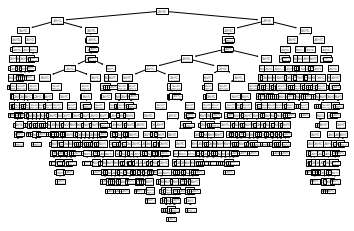

In [58]:
dtree = tree.plot_tree(dtc)